# 1. Install Dependencies and Setup


In [1]:
# pip install tensorflow tensorflow-gpu opencv-python matplotlib

In [2]:
# pip list

In [3]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt

In [4]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [5]:
tf.config.list_physical_devices('GPU')

[]

# 2. Remove dodgy images


In [6]:
import cv2
import imghdr

C:\Users\njaya\AppData\Local\Temp\ipykernel_17532\4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [10]:
data_dir = 'data/PokemonData/' 

In [8]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [11]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# 3. Load Data


In [12]:
import numpy as np
from matplotlib import pyplot as plt
import os

In [13]:
data = tf.keras.utils.image_dataset_from_directory('data/PokemonData/', label_mode='categorical')



Found 6820 files belonging to 150 classes.


In [14]:
classes = os.listdir('data/PokemonData/')
classes

['Abra',
 'Aerodactyl',
 'Alakazam',
 'Alolan Sandslash',
 'Arbok',
 'Arcanine',
 'Articuno',
 'Beedrill',
 'Bellsprout',
 'Blastoise',
 'Bulbasaur',
 'Butterfree',
 'Caterpie',
 'Chansey',
 'Charizard',
 'Charmander',
 'Charmeleon',
 'Clefable',
 'Clefairy',
 'Cloyster',
 'Cubone',
 'Dewgong',
 'Diglett',
 'Ditto',
 'Dodrio',
 'Doduo',
 'Dragonair',
 'Dragonite',
 'Dratini',
 'Drowzee',
 'Dugtrio',
 'Eevee',
 'Ekans',
 'Electabuzz',
 'Electrode',
 'Exeggcute',
 'Exeggutor',
 'Farfetchd',
 'Fearow',
 'Flareon',
 'Gastly',
 'Gengar',
 'Geodude',
 'Gloom',
 'Golbat',
 'Goldeen',
 'Golduck',
 'Golem',
 'Graveler',
 'Grimer',
 'Growlithe',
 'Gyarados',
 'Haunter',
 'Hitmonchan',
 'Hitmonlee',
 'Horsea',
 'Hypno',
 'Ivysaur',
 'Jigglypuff',
 'Jolteon',
 'Jynx',
 'Kabuto',
 'Kabutops',
 'Kadabra',
 'Kakuna',
 'Kangaskhan',
 'Kingler',
 'Koffing',
 'Krabby',
 'Lapras',
 'Lickitung',
 'Machamp',
 'Machoke',
 'Machop',
 'Magikarp',
 'Magmar',
 'Magnemite',
 'Magneton',
 'Mankey',
 'Marowak',
 '

In [15]:
data_iterator = data.as_numpy_iterator()

In [16]:
batch = data_iterator.next()

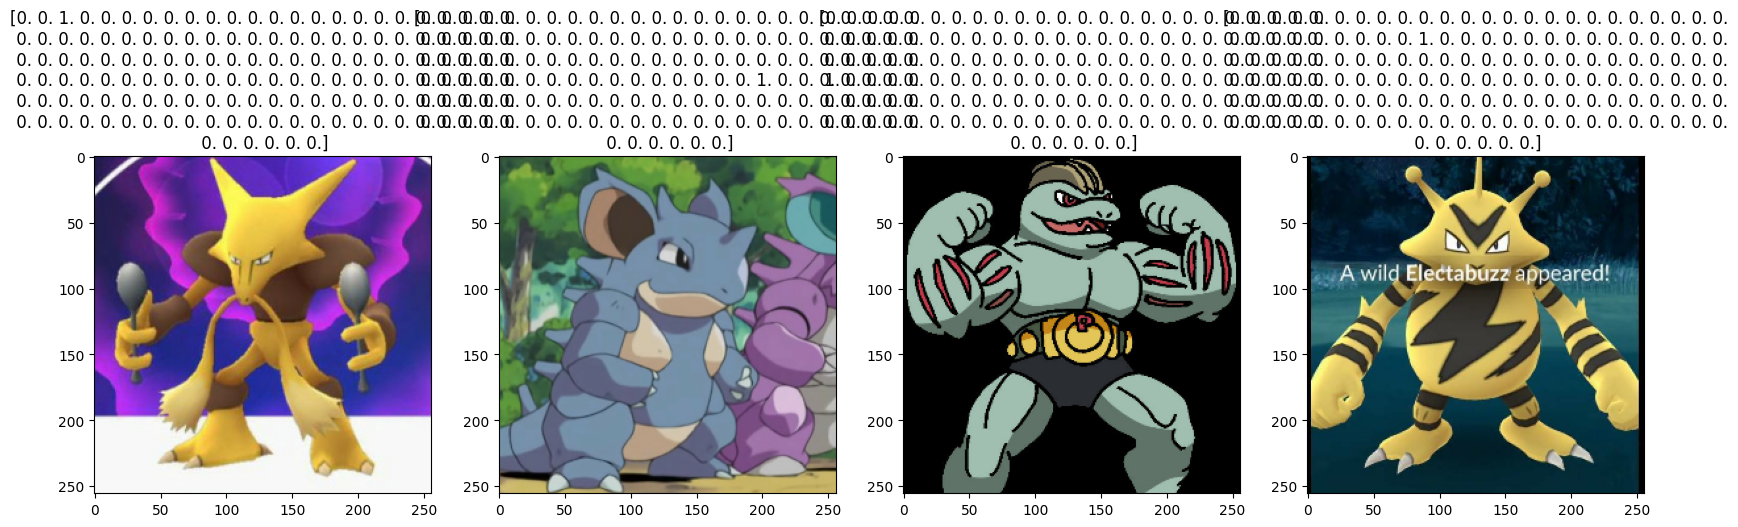

In [17]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data


In [18]:
data = data.map(lambda x,y: (x/255, y))

In [19]:
data.as_numpy_iterator().next()

(array([[[[0.36862746, 0.6627451 , 0.78431374],
          [0.36862746, 0.6627451 , 0.78431374],
          [0.36862746, 0.6627451 , 0.78431374],
          ...,
          [0.41665134, 0.68587625, 0.78959864],
          [0.42850795, 0.6901961 , 0.7950215 ],
          [0.43137255, 0.6901961 , 0.7921569 ]],
 
         [[0.36862746, 0.6627451 , 0.78431374],
          [0.36862746, 0.6627451 , 0.78431374],
          [0.36862746, 0.6627451 , 0.78431374],
          ...,
          [0.42571664, 0.6949415 , 0.79706746],
          [0.4356158 , 0.69730395, 0.79953325],
          [0.4384804 , 0.69730395, 0.7992647 ]],
 
         [[0.36862746, 0.6627451 , 0.7776961 ],
          [0.36862746, 0.6627451 , 0.7776961 ],
          [0.36862746, 0.6627451 , 0.7776961 ],
          ...,
          [0.4350945 , 0.70431936, 0.8044577 ],
          [0.44296876, 0.70465684, 0.804834  ],
          [0.44583333, 0.70465684, 0.8       ]],
 
         ...,
 
         [[0.6942402 , 0.7060049 , 0.5283088 ],
          [0.69182

# 5. Split Data


In [20]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [21]:
test_size

21

In [22]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model


In [23]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 150), dtype=tf.float32, name=None))>

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [25]:
model = Sequential()

In [26]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(150, activation='softmax'))  # 150 output units for 150 classes


In [27]:
model.compile('adam', loss=tf.losses.CategoricalCrossentropy(), metrics=['accuracy'])


In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

# 7. Train


In [29]:
logdir='logs'

In [30]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [31]:
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10


149/149 [==============================] - 72s 479ms/step - loss: 4.7973 - accuracy: 0.0312 - val_loss: 4.1462 - val_accuracy: 0.0856
Epoch 2/10
149/149 [==============================] - 70s 469ms/step - loss: 3.4044 - accuracy: 0.2234 - val_loss: 2.9516 - val_accuracy: 0.2984
Epoch 3/10
149/149 [==============================] - 71s 475ms/step - loss: 1.9121 - accuracy: 0.5218 - val_loss: 2.6711 - val_accuracy: 0.3973
Epoch 4/10
149/149 [==============================] - 74s 496ms/step - loss: 0.9034 - accuracy: 0.7708 - val_loss: 2.7391 - val_accuracy: 0.4688
Epoch 5/10
149/149 [==============================] - 73s 490ms/step - loss: 0.3577 - accuracy: 0.9065 - val_loss: 3.0880 - val_accuracy: 0.4807
Epoch 6/10
149/149 [==============================] - 74s 494ms/step - loss: 0.1856 - accuracy: 0.9516 - val_loss: 3.6895 - val_accuracy: 0.4680
Epoch 7/10
149/149 [==============================] - 71s 477ms/step - loss: 0.1362 - accuracy: 0.9671 - val_loss: 3.9032 - val_accuracy: 0.4

# 8. Plot Performance


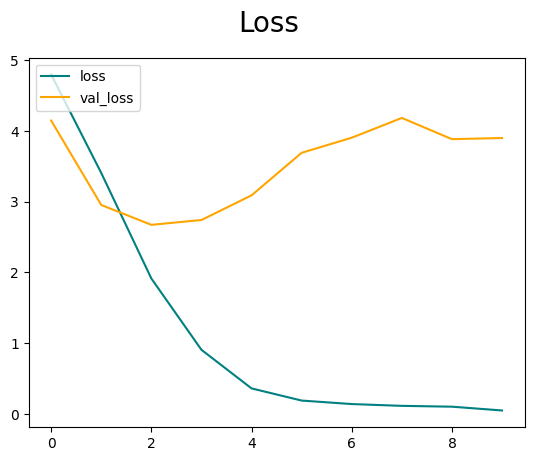

In [32]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

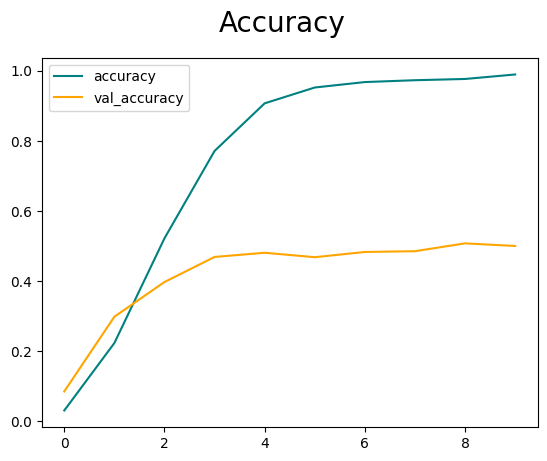

In [33]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate


In [34]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [35]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [36]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 111ms/step


In [37]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.46643108, shape=(), dtype=float32) tf.Tensor(0.39285713, shape=(), dtype=float32) tf.Tensor(0.99295634, shape=(), dtype=float32)


# 10. Test


In [38]:
# import cv2

In [39]:
# img = cv2.imread('check.png')
# plt.imshow(img)
# plt.show()

In [40]:
# image_path = 'check.png'
# img = cv2.imread(image_path)
# img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
# resize = tf.image.resize(img_rgb, (256, 256)) # Resize the image to match the model's input size
# input_image = np.expand_dims(resize / 255, 0)
# plt.imshow(img)
# plt.show()

In [41]:
# yhat = model.predict(np.expand_dims(resize/255, 0))

In [42]:
# image_path = 'check.png'
# img = cv2.imread(image_path)
# img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
# resize = tf.image.resize(img_rgb, (256, 256)) # Resize the image to match the model's input size
# input_image = np.expand_dims(resize / 255, 0)  # Normalize and add batch dimension

# # Use the model to make predictions
# predictions = model.predict(input_image)

# # Get the predicted class index (index with the highest probability)
# predicted_class_index = np.argmax(predictions)

# # Map the class index to the class name
# # class_names = ['class1', 'class2', ..., 'class150']  # Replace with your class names
# predicted_class_name = classes[predicted_class_index]

# # Display the image with the predicted class name
# plt.imshow(resize.numpy().astype(int))
# plt.title(f'Predicted class: {predicted_class_name}')
# plt.show()

In [43]:
# yhat

In [44]:
# plt.show(yhat)

# 11. Save the Model


In [45]:
from tensorflow.keras.models import load_model

In [46]:
model.save(os.path.join('models','imageclassifier.h5'))

c:\Users\njaya\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [47]:
# new_model = load_model('./models/imageclassifier.h5')

In [48]:
# image_path = 'check2.png'
# img = cv2.imread(image_path)
# img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
# resize = tf.image.resize(img_rgb, (256, 256)) # Resize the image to match the model's input size
# input_image = np.expand_dims(resize / 255, 0)  # Normalize and add batch dimension

# # Use the model to make predictions
# predictions = new_model.predict(input_image)

# # Get the predicted class index (index with the highest probability)
# predicted_class_index = np.argmax(predictions)

# # Map the class index to the class name
# # class_names = ['class1', 'class2', ..., 'class150']  # Replace with your class names
# predicted_class_name = classes[predicted_class_index]

# # Display the image with the predicted class name
# plt.imshow(resize.numpy().astype(int))
# plt.title(f'Predicted class: {predicted_class_name}')
# plt.show()

In [49]:
# new_model.predict(np.expand_dims(resize/255, 0))